In [1]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

Get the data and pre-process it

In [2]:
(X_train,y_train),(X_test, y_test) = mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

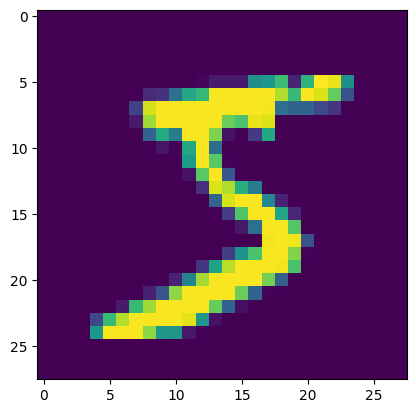

In [3]:
plt.imshow(X_train[0])

In [4]:
def plot_input_img(i):
    plt.imshow(X_train[i], cmap='binary')
    plt.title(y_train[i])
    plt.show()

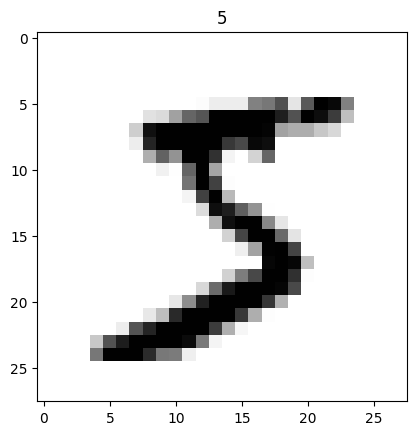

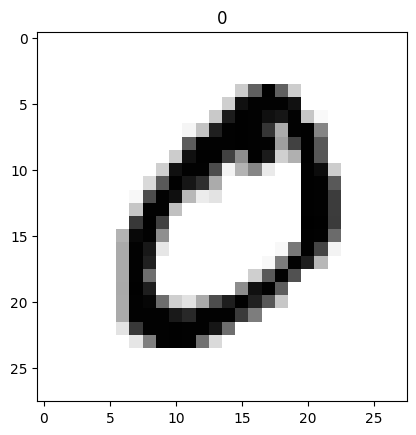

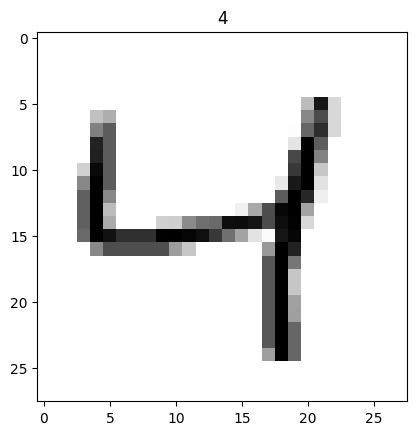

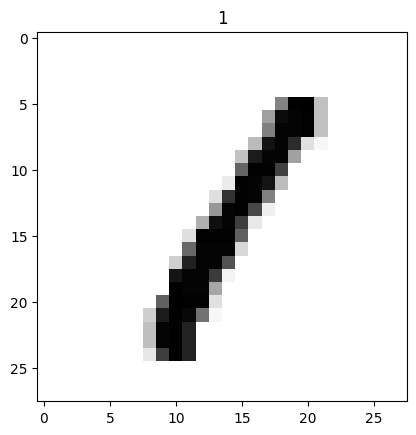

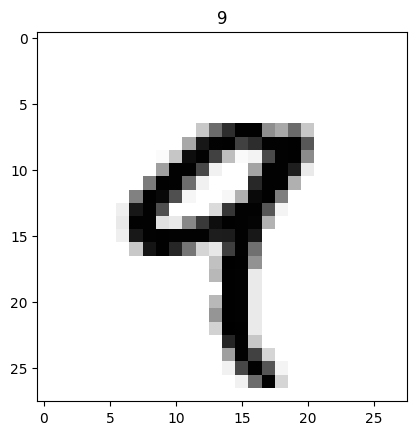

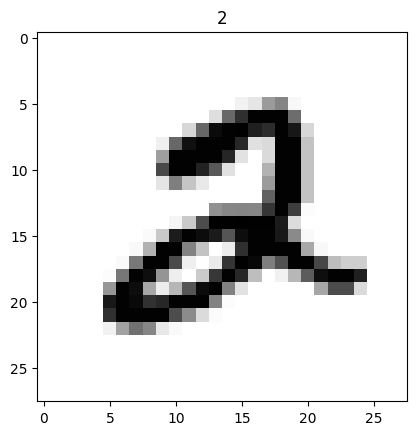

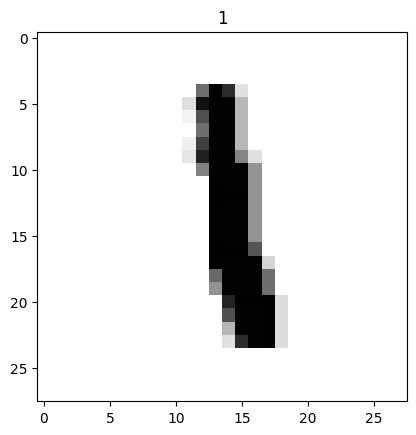

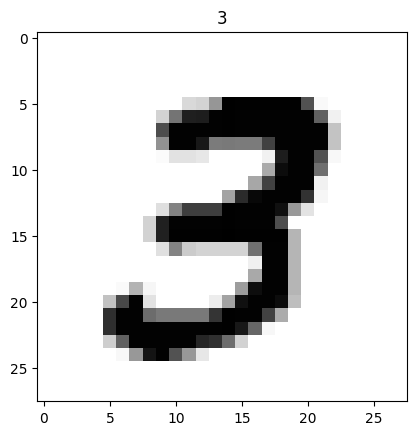

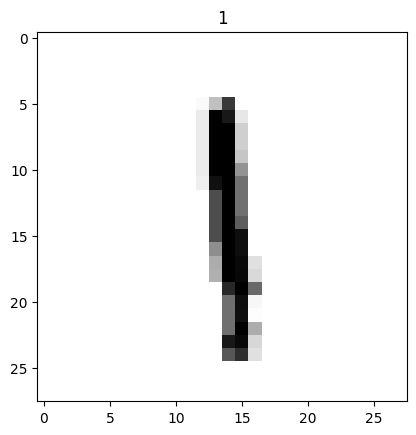

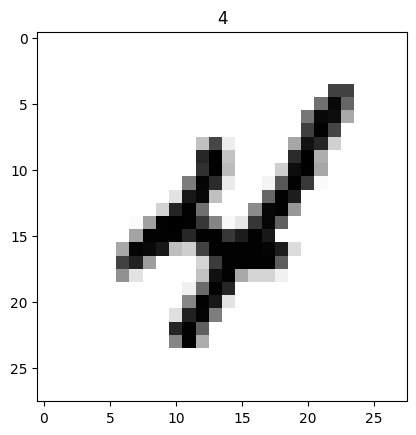

In [5]:
for i in range(10):
    plot_input_img(i)

In [6]:
#pre-process the image

#Normalizing the image to [0,1] range
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

#Reshape/ expand the dimensions of images to (28,28,1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

#Convert classes to one hot vectors

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [7]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape =(28,28,1), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.25))

model.add(Dense(10, activation='softmax'))


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [9]:
model.compile(optimizer = 'adam', loss= keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [10]:
#CALLBACKS
from keras.callbacks import EarlyStopping, ModelCheckpoint

#EARLYSTOPPING
es = EarlyStopping(monitor='val_acc', min_delta= 0.01, patience= 4, verbose= 1)

#MODEL CHECK POINT
mc = ModelCheckpoint("./bestmodel.h5", monitor="val_acc", verbose= 1, save_best_only= True)

cb = [es,mc]

MODEL TRAINING

In [11]:
his = model.fit(X_train, y_train, epochs= 5, validation_split= 0.3, callbacks= cb)

Epoch 1/5
1313/1313 [==============================] - 87s 65ms/step - loss: 0.2182 - accuracy: 0.9334 - val_loss: 0.0827 - val_accuracy: 0.9738
Epoch 2/5
1313/1313 [==============================] - 92s 70ms/step - loss: 0.0748 - accuracy: 0.9768 - val_loss: 0.0547 - val_accuracy: 0.9826
Epoch 3/5
1313/1313 [==============================] - 93s 71ms/step - loss: 0.0564 - accuracy: 0.9824 - val_loss: 0.0565 - val_accuracy: 0.9831
Epoch 4/5
1313/1313 [==============================] - 98s 75ms/step - loss: 0.0458 - accuracy: 0.9854 - val_loss: 0.0498 - val_accuracy: 0.9854
Epoch 5/5
1313/1313 [==============================] - 103s 79ms/step - loss: 0.0391 - accuracy: 0.9868 - val_loss: 0.0449 - val_accuracy: 0.9857


In [23]:
model_S = keras.models.load_model("./bestmodel.h5") 

OSError: No file or directory found at ./bestmodel.h5